## Code for Non-Revealing Game

In [93]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import copy

### Helper Functions

In [94]:
# Helper function to print the payoff table
def printMatrix(s):

    # Do heading
    print("     ", end="")
    for j in range(len(s[0])):
        print("%5s " % j, end="")
    print()
    print("     ", end="")
    for j in range(len(s[0])):
        print("------", end="")
    print()
    # Matrix contents
    for i in range(len(s)):
        print("%3s |" % (i), end="") # Row nums
        for j in range(len(s[0])):
            if type(s[i][j]) == np.float64:
                temp = round(s[i][j], 2)
            else:
                temp = s[i][j]
            print("%5s " % (temp), end="")
        print()

In [95]:
# get average payoff matrix of two types
def get_av_val(val_r, val_l, p):
    return p*val_l + (1-p)*val_r

In the non-revealing game, we need to build the value function as: $V(x, t, p) = cav\;\;\max_u \min_v V(x', t+1, p)$. Previously we just built it as: $V(x, t, p) = \max_u \min_v V(x', t+1, p)$

### Game Settings

In [96]:
num_states = 5
s = np.linspace(0, num_states-1, num_states)
states = np.array(list(itertools.product(s, repeat=2)))

### Value Function for any time t

In [97]:
def get_inter_value(timestep, game_dict, states, returnstate=0):
    
    def get_game_dict(timestep, game_dict, states, valuefun = get_inter_value):
        return valuefun(timestep, game_dict, states, returnstate=1)
    
    # get game dict for t-1 timestep to calculate value at t
    if timestep > 1 and returnstate ==0:
        temp_game = copy.deepcopy(game_dict)
        for i in range(1, timestep):
            average, _ = get_game_dict(i, temp_game, states)
            temp_game = dict(zip(states.flatten(), average.flatten()))

        game_dict = copy.deepcopy(temp_game)
#         printMatrix(average)
    
    
    temp = np.full(states.shape, np.nan)
    action = np.full(states.shape, '%', dtype='U25')
    p1_amap = {'0': 'l', '1': 'L', '2': 'r', '3': 'R'}
    p2_amap = {'0': 'l', '1': 'r'}
        
        
    # first row value # min max
    for i in range(timestep):
        for j in range(timestep, num_states-timestep):
#             temp[i, j] = game_dict[states[i, j]]
            payoff = np.zeros((4, 2)) 
            if i - 1 < 0:
                new_L = i
                new_l = i
            elif i - 2 < 0:
                new_L = i - 1
                new_l = i - 1
            else:
                new_l = i - 1
                new_L = i - 2
            
            payoff[0, 0] = game_dict[states[new_l, j-1]] # left left
            payoff[0, 1] = game_dict[states[new_l, j+1]] # left right
            payoff[1, 0] = game_dict[states[new_L, j-1]] # Left left
            payoff[1, 1] = game_dict[states[new_L, j+1]] # Left right
            payoff[2, 0] = game_dict[states[i+1, j-1]] # right left
            payoff[2, 1] = game_dict[states[i+1, j+1]] # right right
            payoff[3, 0] = game_dict[states[i+2, j-1]] # Right left
            payoff[3, 1] = game_dict[states[i+2, j+1]] # Right right
        
            # find maximin
            temp[i, j] = np.max(np.min(payoff, 1))
            action_idx = np.where(np.min(payoff, 1) == temp[i, j])[0] # check for same values
            if len(action_idx) == 1:
                action[i, j] = p1_amap[str(action_idx[0])] 
            elif len(action_idx) == 4:
                action[i, j] = 'A'
            else:
                ac = ''
                for a in action_idx:
                    ac += p1_amap[str(a)]
                action[i, j] = ac
    
#     printMatrix(temp)
    # last row value
    for i in range(num_states - timestep, num_states):
        for j in range(timestep, num_states-timestep):
#             temp[i, j] = game_dict[states[i, j]]
            payoff = np.zeros((4, 2)) 
            if i + 1 > num_states - 1:
                new_R = i
                new_r = i
            elif i + 2 > num_states - 1:
                new_r = i + 1 
                new_R = i + 1
            else:
                new_r = i + 1
                new_R = i + 2
            
            payoff[0, 0] = game_dict[states[i-1, j-1]] # left left
            payoff[0, 1] = game_dict[states[i-1, j+1]] # left right
            payoff[1, 0] = game_dict[states[i-2, j-1]] # Left left
            payoff[1, 1] = game_dict[states[i-2, j+1]] # Left right
            payoff[2, 0] = game_dict[states[new_r, j-1]] # right left
            payoff[2, 1] = game_dict[states[new_r, j+1]] # right right
            payoff[3, 0] = game_dict[states[new_R, j-1]] # Right left
            payoff[3, 1] = game_dict[states[new_R, j+1]] # Right right
        
            # find maximin
            temp[i, j] = np.max(np.min(payoff, 1))
            action_idx = np.where(np.min(payoff, 1) == temp[i, j])[0] # check for same values
            if len(action_idx) == 1:
                action[i, j] = p1_amap[str(action_idx[0])] 
            elif len(action_idx) == 4:
                action[i, j] = 'A'
            else:
                ac = ''
                for a in action_idx:
                    ac += p1_amap[str(a)]
                action[i, j] = ac

        
    for i in range(timestep, num_states - timestep): # row
        for j in range(timestep, num_states - timestep): # column
            payoff = np.zeros((4, 2)) # payoff matrix for each game
            if i - 2 < 0:
                new_l = i - 1
            else:
                new_l = i - 2
            if i + 2 > num_states - 1: #14:
                new_r = i + 1
            else:
                new_r = i + 2
                
            payoff[0, 0] = game_dict[states[i-1, j-1]] # left left
            payoff[0, 1] = game_dict[states[i-1, j+1]] # left right
            payoff[1, 0] = game_dict[states[new_l, j-1]] # Left left
            payoff[1, 1] = game_dict[states[new_l, j+1]] # Left right
            payoff[2, 0] = game_dict[states[i+1, j-1]] # right left
            payoff[2, 1] = game_dict[states[i+1, j+1]] # right right
            payoff[3, 0] = game_dict[states[new_r, j-1]] # Right left
            payoff[3, 1] = game_dict[states[new_r, j+1]] # Right right

            # find maximin
            temp[i, j] = np.max(np.min(payoff, 1))
            action_idx = np.where(np.min(payoff, 1) == temp[i, j])[0] # check for same values
            if len(action_idx) == 1:
                action[i, j] = p1_amap[str(action_idx[0])] 
            elif len(action_idx) == 4:
                action[i, j] = 'A'
            else:
                ac = ''
                for a in action_idx:
                    ac += p1_amap[str(a)]
                action[i, j] = ac

    return temp, action

### Some Tests

In [98]:
# payoff for P1: Type Left
val_L_T = np.zeros((len(s), len(s)))
for i in range(num_states):
    val_L_T[np.triu_indices(num_states, k = i)] = i

val_L_T = val_L_T.reshape(num_states, num_states)
val_R_T = val_L_T.T

In [99]:
s_pairs = np.array([[''.join(str(states[i, :])) for i in range(len(states))]])
s_pairs = s_pairs.reshape(num_states, num_states)

In [195]:
# set p
p = 0
timestep = 1

average_game = get_av_val(val_R_T, val_L_T, p=p)
average_dict = dict(zip(s_pairs.flatten(), average_game.flatten()))
cav_v, _, = get_inter_value(1, average_dict, s_pairs)
ps = np.linspace(0, 1, 50)
cav_test = np.zeros((5, 5, len(ps)))
for i in range(len(ps)):
    average_game = get_av_val(val_R_T, val_L_T, p=ps[i])
    average_dict = dict(zip(s_pairs.flatten(), average_game.flatten()))
    temp, _ = get_inter_value(1, average_dict, s_pairs)
    cav_test[:, :, i] = temp
    
for row in range(5):
    for col in range(timestep, num_states-timestep):
        vals = cav_test[row, col, :]
        if len(np.where(vals == np.max(vals))[0]) > 1:
            p_min = ps[np.where(vals == np.max(vals))[0][0]]
            if row == 2 and col == 2:
                print(p_min)
            if p > p_min:
                cav_v[row, col] = np.max(vals)

0.0


In [196]:
printMatrix(cav_v)

         0     1     2     3     4 
     ------------------------------
  0 |  nan   0.0   0.0   0.0   nan 
  1 |  nan   1.0   0.0   0.0   nan 
  2 |  nan   2.0   1.0   0.0   nan 
  3 |  nan   2.0   1.0   0.0   nan 
  4 |  nan   2.0   1.0   0.0   nan 


In [194]:
printMatrix(cav_v)

         0     1     2     3     4 
     ------------------------------
  0 |  nan   0.4   0.4   0.8   nan 
  1 |  nan   0.6   0.4   0.8   nan 
  2 |  nan   1.2   1.0   0.8   nan 
  3 |  nan   1.2   0.6   0.4   nan 
  4 |  nan   1.2   0.6   0.4   nan 


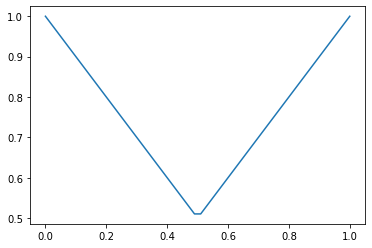

In [103]:
plt.plot(ps, cav_test[2, 2, :])

In [104]:
cav_v[2, 2]

1.0

In [350]:
get_av_val(val_R_T, val_L_T, p = 0.5)

array([[0. , 0.5, 1. , 1.5, 2. ],
       [0.5, 0. , 0.5, 1. , 1.5],
       [1. , 0.5, 0. , 0.5, 1. ],
       [1.5, 1. , 0.5, 0. , 0.5],
       [2. , 1.5, 1. , 0.5, 0. ]])

### Calculate Cav of V -- For 2 Time steps (state_dim = 5)

In [340]:
def get_cav_v(timestep, game_dict, states, p, returnstate=0):
    
    def get_game_dict(timestep, game_dict, states, p, valuefun = get_cav_v):
        return valuefun(timestep, game_dict, states, p, returnstate=1)
    
    if timestep == 1:
        cav_v, _, = get_inter_value(1, game_dict, states)
        ps = np.linspace(0, 1, 50)
        cav_test = np.zeros((5, 5, len(ps)))
        ps = np.linspace(0, 1, 50)
        cav_test = np.zeros((5, 5, len(ps)))
        for i in range(len(ps)):
            average_game = get_av_val(val_R_T, val_L_T, p=ps[i])
            average_dict = dict(zip(s_pairs.flatten(), average_game.flatten()))
            temp, _ = get_inter_value(1, average_dict, s_pairs)
            cav_test[:, :, i] = temp

        for row in range(5):
            for col in range(timestep, num_states-timestep):
                vals = cav_test[row, col, :]
                if len(np.where(vals == np.max(vals))[0]) > 1:
                    p_min = ps[np.where(vals == np.max(vals))[0][0]]
                    p_max = ps[np.where(vals == np.max(vals))[0][-1]]
                    if p > p_min and p < p_max:
                        cav_v[row, col] = np.max(vals)
#         print(p)
#         if p > 0.37:
#             printMatrix(cav_v)
#             input()
    
    if timestep > 1 and returnstate==0:
        ps = np.linspace(0, 1, 50)
        cav_v, _, = get_inter_value(timestep, game_dict, states)
        for i in range(1, timestep):
            cavs = np.zeros((num_states, num_states, len(ps)))
            for j in range(len(ps)):
                av_game = get_av_val(val_R_T, val_L_T, p=ps[j])
                av_dict = dict(zip(states.flatten(), av_game.flatten()))
                cavs[:, :, j] = get_game_dict(i, av_dict, states, p=ps[j])
            
            for row in range(num_states):
                for col in range(i, num_states-i):
                    vals = cavs[row, col, :]
#                     if row == 0 and col == 1:
#                         print(np.where(vals == np.max(vals)))
                    if len(np.where(vals == np.max(vals))[0]) > 1:
                        p_min = ps[np.where(vals == np.max(vals))[0][0]]
                        p_max = ps[np.where(vals == np.max(vals))[0][-1]]
#                         print(p_max)
                        if p > p_min and p < p_max:
                            cav_v[row, col] = np.max(vals)
    return cav_v

In [341]:
num_states = 5
average_game = get_av_val(val_R_T, val_L_T, p=0.1)
average_dict = dict(zip(s_pairs.flatten(), average_game.flatten()))
printMatrix(get_cav_v(1, average_dict, s_pairs, p=0.9))

         0     1     2     3     4 
     ------------------------------
  0 |  nan   0.1   0.1   0.2   nan 
  1 |  nan   0.9   0.1   0.2   nan 
  2 |  nan   1.8   1.0   0.2   nan 
  3 |  nan   1.8   0.9   0.1   nan 
  4 |  nan   1.8   0.9   0.1   nan 


In [346]:
printMatrix(get_cav_v(1, average_dict, s_pairs, p=0.4))

         0     1     2     3     4 
     ------------------------------
  0 |  nan   0.1   0.1   0.2   nan 
  1 |  nan   0.9   0.1   0.2   nan 
  2 |  nan   1.8   1.0   0.2   nan 
  3 |  nan   1.8   0.9   0.1   nan 
  4 |  nan   1.8   0.9   0.1   nan 


In [387]:
from scipy.optimize import minimize
import random
from itertools import product

def get_strategy(game_dict, states, p):
    '''
    @params: lambda_j >= 0
             p_j \in {p_1, 1-p_1}
             
    @constraints: \sum lambda_j = 1
                 \sum lambda_j*p_j = p
    '''
    # first get strategy at initial time-step
    # initial state is always (2, 2)
    
    def optimization(p, V_curr, curr_x, game_dict):
    
        def constraint(var):
            lam_1 = var[0]
            lam_2 = 1 - lam_1
            p_1 = var[1]
            p_2 = var[2]
#             p_2 = (p - lam_1*p_1)/(lam_2 + 1e-10)

            lam_j = np.array([[lam_1], [lam_2]])
            p_j = np.array([[p_1], [p_2]])
            
#             return p_2 >= 0 and p_2 <= 1
#
            return abs((np.matmul(lam_j.T, p_j) - p).item()) <= 1e-6

        def objective(var):

            # here, V_curr is the value at the current state
            # V_next is the max min value at the previous state leading to current state
            lam_1 = var[0]
            lam_2 = 1 - lam_1
            p_1 = var[1]
            p_2 = var[2]
#             p_2 = (p - lam_1*p_1)/(lam_2+1e-10)

            lam_j = np.array([[lam_1], [lam_2]])
            v_next = np.zeros((2, 1))
            if curr_x == [2, 2]:
                game_dict_1 = get_av_val(val_R_T, val_L_T, p_1)
                game_dict_1 = dict(zip(states.flatten(), game_dict_1.flatten()))
                game_dict_2 = get_av_val(val_R_T, val_L_T, p_2)
                game_dict_2 = dict(zip(states.flatten(), game_dict_2.flatten()))
                v_next_0 = get_cav_v(1, game_dict_1, states, p_1)
                v_next_1 = get_cav_v(1, game_dict_2, states, p_2)
                
                pay_0 = np.zeros((4, 2))
                pay_1 = np.zeros((4, 2))
                
                pay_0[0, 0] = v_next_0[1, 1]
                pay_0[0, 1] = v_next_0[1, 3]
                pay_0[1, 0] = v_next_0[0, 1]
                pay_0[1, 1] = v_next_0[0, 3]
                pay_0[2, 0] = v_next_0[3, 1]
                pay_0[2, 1] = v_next_0[3, 3]
                pay_0[3, 0] = v_next_0[4, 1]
                pay_0[3, 1] = v_next_0[4, 3]
                
                pay_1[0, 0] = v_next_1[1, 1]
                pay_1[0, 1] = v_next_1[1, 3]
                pay_1[1, 0] = v_next_1[0, 1]
                pay_1[1, 1] = v_next_1[0, 3]
                pay_1[2, 0] = v_next_1[3, 1]
                pay_1[2, 1] = v_next_1[3, 3]
                pay_1[3, 0] = v_next_1[4, 1]
                pay_1[3, 1] = v_next_1[4, 3]
                
                # do min max on v_next
                v_next[0] = np.max(np.min(pay_0, 1))
                v_next[1] = np.max(np.min(pay_1, 1))
                
            else: # that is, some other state in the second time-step
                
                i = curr_x[0]
                j = curr_x[1]
                
                v_next_0 = get_av_val(val_R_T, val_L_T, p_1)
                v_next_1 = get_av_val(val_R_T, val_L_T, p_2)
                
                pay_0 = np.zeros((4, 2))
                pay_1 = np.zeros((4, 2))
                
                if i - 1 < 0:
                    new_L = i
                    new_l = i
                elif i - 2 < 0:
                    new_L = i - 1
                    new_l = i - 1
                else:
                    new_l = i - 1
                    new_L = i - 2
                    
                if i + 1 > num_states - 1:
                    new_R = i
                    new_r = i
                elif i + 2 > num_states - 1:
                    new_r = i + 1 
                    new_R = i + 1
                else:
                    new_r = i + 1
                    new_R = i + 2

                pay_0[0, 0] = v_next_0[new_l, j-1] # left left
                pay_0[0, 1] = v_next_0[new_l, j+1] # left right
                pay_0[1, 0] = v_next_0[new_L, j-1] # Left left
                pay_0[1, 1] = v_next_0[new_L, j+1] # Left right
                pay_0[2, 0] = v_next_0[new_r, j-1] # right left
                pay_0[2, 1] = v_next_0[new_r, j+1] # right right
                pay_0[3, 0] = v_next_0[new_R, j-1] # Right left
                pay_0[3, 1] = v_next_0[new_R, j+1] # Right right
                
                pay_1[0, 0] = v_next_1[new_l, j-1] # left left
                pay_1[0, 1] = v_next_1[new_l, j+1] # left right
                pay_1[1, 0] = v_next_1[new_L, j-1] # Left left
                pay_1[1, 1] = v_next_1[new_L, j+1] # Left right
                pay_1[2, 0] = v_next_1[new_r, j-1] # right left
                pay_1[2, 1] = v_next_1[new_r, j+1] # right right
                pay_1[3, 0] = v_next_1[new_R, j-1] # Right left
                pay_1[3, 1] = v_next_1[new_R, j+1] # Right right
                
                # do min max on v_next
                v_next[0] = np.max(np.min(pay_0, 1))
                v_next[1] = np.max(np.min(pay_1, 1))
                    
            
            return abs((V_curr -  np.matmul(lam_j.T, v_next)).item())
    
        
        cons = ({'type': 'eq', 'fun': constraint})
        bnds = ((0, 1), (0, 1), (0, 1), (p, p))
#         x0 = [0, 0, 0, p]
        
        # cannot use scipy optimization
#         res = minimize(objective, x0, bounds = bnds, constraints = cons, options={'disp': True})
#         print(objective(x0))

        lam = np.linspace(0, 1, 1000)
#         p_1 = np.arange(0, 1, 0.25)
#         p_2 = np.arange(0, 1, 0.25)
        
        grid = product(lam, repeat=3)
        reduced = filter(constraint, grid)
        res = min(reduced, key=objective)
#         res = min(grid, key=objective)

        print(objective(res))
        
        
        return res
       
    print(f'Current position is center (2, 2) and the belief is {p}\n')
    p_t = p
    a_map = {'0': 'l', '1': 'L', '2': 'r', '3': 'R'}
    # first get strategy for initial state (2, 2)
    start_x = [2, 2]
    V_curr = get_cav_v(2, game_dict, states, p_t)[2, 2]
    
    lam_j, p_1, p_2 = optimization(p_t, V_curr, start_x, game_dict)
#     lam_j, p_1 = optimization(p_t, V_curr, start_x, game_dict)
#     p_2 = (p_t - lam_j*p_1)/(1 - lam_j + 1e-10)
    print(f'lamda_1 = {lam_j:.2f}, p_1 = {p_1:.2f},  p_2 = {p_2:.2f}\n')
#     input()
    
    
    # action for lam_1 
    game_dict_1 = get_av_val(val_R_T, val_L_T, p_1)
    game_dict_1 = dict(zip(s_pairs.flatten(), game_dict_1.flatten()))
    game_dict_2 = get_av_val(val_R_T, val_L_T, p_2)
    game_dict_2 = dict(zip(s_pairs.flatten(), game_dict_2.flatten()))

    v_next_0 = get_cav_v(1, game_dict_1, states, p_1)
    v_next_1 = get_cav_v(1, game_dict_2, states, p_2)
    
    pay_0 = np.zeros((4, 2))
    pay_1 = np.zeros((4, 2))

    pay_0[0, 0] = v_next_0[1, 1]
    pay_0[0, 1] = v_next_0[1, 3]
    pay_0[1, 0] = v_next_0[0, 1]
    pay_0[1, 1] = v_next_0[0, 3]
    pay_0[2, 0] = v_next_0[3, 1]
    pay_0[2, 1] = v_next_0[3, 3]
    pay_0[3, 0] = v_next_0[4, 1]
    pay_0[3, 1] = v_next_0[4, 3]
    
    v_0 = np.max(np.min(pay_0, 1))
    a_0 = None
    a_0_idx = np.where(np.min(pay_0, 1) == v_0)[0] # check for same values
    if len(a_0_idx) == 1:
        a_0 = a_map[str(a_0_idx[0])]
    elif len(a_0_idx) == 4:
        a_0 = 'A'
    else:
        ac = ''
        for a in a_0_idx:
            ac += a_map[str(a)]
        a_0 = ac

    pay_1[0, 0] = v_next_1[1, 1]
    pay_1[0, 1] = v_next_1[1, 3]
    pay_1[1, 0] = v_next_1[0, 1]
    pay_1[1, 1] = v_next_1[0, 3]
    pay_1[2, 0] = v_next_1[3, 1]
    pay_1[2, 1] = v_next_1[3, 3]
    pay_1[3, 0] = v_next_1[4, 1]
    pay_1[3, 1] = v_next_1[4, 3]
    
    v_1 = np.max(np.min(pay_1, 1))
    a_1 = None
    a_1_idx = np.where(np.min(pay_1, 1) == v_1)[0] # check for same values
    if len(a_1_idx) == 1:
        a_1 = a_map[str(a_1_idx[0])]
    elif len(a_1_idx) == 4:
        a_1 = 'A'
    else:
        ac = ''
        for a in a_1_idx:
            ac += a_map[str(a)]
        a_1 = ac
        
    # calculate probability of each action
    if p1_type == 0:
        p_i = 1 - p_t
        p_1j = 1 - p_1
        p_2j = 1 - p_2
    else:
        p_i = p_t 
        p_1j = p_1
        p_2j = p_2
    
    a0_p = (lam_j * p_1j)/p_i
    a1_p = ((1-lam_j) * p_2j)/p_i
    
    print('At initial time, P1 has the following options: \n')
    print(f'P1 takes action {a_0} with probability {a0_p:.2f} and moves belief to {p_1:.2f}')
    print(f'P1 takes action {a_1} with probability {a1_p:.2f} and moves belief to {p_2:.2f}\n')
    
    # Now get strategy for second stage:
    
#     a_0 = np.random.choice(list(a_map.keys()), size=1, p=[0.25, 0.25, 0.25, 0.25])
#     print(a_map[a_0.item()])
    dist = [a0_p, a1_p]
    a_idx = [0, 1]
    action_idx = random.choices(a_idx, dist)[0]
    if action_idx == 0:
        action_1 = a_0
        p_t = p_1
    else:
        action_1 = a_1
        p_t = p_2
        
     # for simulation purpose select p2's action randomly
    p2_a = random.choices([1, -1], [0.5, 0.5])[0] # left or right
    p2_action = 'l' if p2_a == -1 else 'r'
    
    
    print(f'P1 chooses action: {action_1} and moves the belief to p_t = {p_t:.2f}')
    print(f'P2 chooses action: {p2_action} at random\n')
    ##########################################################################################
    #################################### NEXT TIME-STEP ######################################
    ##########################################################################################
    
   
    
    if action_1 == 'l':
        step = -1
    elif action_1 == 'r':
        step = 1
    elif action_1 == 'L':
        step = -2
    elif aciton_1 == 'R':
        step = 2
    
    curr_x = start_x
    curr_x = np.array(curr_x) + np.array([step, p2_a])  # get current position
    
    print(f'The current position is: {curr_x}\n')
    
    game = get_av_val(val_R_T, val_L_T, p=p_t)
    game_dict = dict(zip(states.flatten(), game.flatten()))
    V_curr = get_cav_v(1, game_dict, states, p_t)[curr_x[0], curr_x[1]]
    
    lam_j, p_1, p_2 = optimization(p_t, V_curr, list(curr_x), game_dict)
#     lam_j, p_1 = optimization(p_t, V_curr, list(curr_x), game_dict)
#     p_2 = (p_t - lam_j*p_1)/(1 - lam_j + 1e-10)
    
    print(f'lamda_1 = {lam_j:.2f}, p_1 = {p_1:.2f},  p_2 = {p_2:.2f}\n')
    
    
    # action for lam_1 
    game_dict_1 = get_av_val(val_R_T, val_L_T, p_1)
#     game_dict_1 = dict(zip(s_pairs.flatten(), game_dict_1.flatten()))
    game_dict_2 = get_av_val(val_R_T, val_L_T, p_2)
#     game_dict_2 = dict(zip(s_pairs.flatten(), game_dict_2.flatten()))

#     v_next_0 = get_cav_v(1, game_dict_1, states, p_1)
#     v_next_1 = get_cav_v(1, game_dict_2, states, p_2)
    v_next_0 = game_dict_1
    v_next_1 = game_dict_2
    
    pay_0 = np.zeros((4, 2))
    pay_1 = np.zeros((4, 2))
    
    i = curr_x[0]
    j = curr_x[1]
    
    if i - 1 < 0:
        new_L = i
        new_l = i
    elif i - 2 < 0:
        new_L = i - 1
        new_l = i - 1
    else:
        new_l = i - 1
        new_L = i - 2

    if i + 1 > num_states - 1:
        new_R = i
        new_r = i
    elif i + 2 > num_states - 1:
        new_r = i + 1 
        new_R = i + 1
    else:
        new_r = i + 1
        new_R = i + 2

#     print(new_l, new_L, new_r, new_R)
    
    pay_0[0, 0] = v_next_0[new_l, j-1] # left left
    pay_0[0, 1] = v_next_0[new_l, j+1] # left right
    pay_0[1, 0] = v_next_0[new_L, j-1] # Left left
    pay_0[1, 1] = v_next_0[new_L, j+1] # Left right
    pay_0[2, 0] = v_next_0[new_r, j-1] # right left
    pay_0[2, 1] = v_next_0[new_r, j+1] # right right
    pay_0[3, 0] = v_next_0[new_R, j-1] # Right left
    pay_0[3, 1] = v_next_0[new_R, j+1] # Right right

    v_0 = np.max(np.min(pay_0, 1))
    a_0 = None
#     printMatrix(pay_0)
    a_0_idx = np.where(np.min(pay_0, 1) == v_0)[0] # check for same values
#     print(a_0_idx)
    if len(a_0_idx) == 1:
        a_0 = a_map[str(a_0_idx[0])]
    elif len(a_0_idx) == 4:
        a_0 = 'A'
    else:
        ac = ''
        for a in a_0_idx:
            ac += a_map[str(a)]
        a_0 = ac

    pay_1[0, 0] = v_next_1[new_l, j-1] # left left
    pay_1[0, 1] = v_next_1[new_l, j+1] # left right
    pay_1[1, 0] = v_next_1[new_L, j-1] # Left left
    pay_1[1, 1] = v_next_1[new_L, j+1] # Left right
    pay_1[2, 0] = v_next_1[new_r, j-1] # right left
    pay_1[2, 1] = v_next_1[new_r, j+1] # right right
    pay_1[3, 0] = v_next_1[new_R, j-1] # Right left
    pay_1[3, 1] = v_next_1[new_R, j+1] # Right right

    v_1 = np.max(np.min(pay_1, 1))
    a_1 = None
    a_1_idx = np.where(np.min(pay_1, 1) == v_1)[0] # check for same values
    
    if len(a_1_idx) == 1:
        a_1 = a_map[str(a_1_idx[0])]
    elif len(a_1_idx) == 4:
        a_1 = 'A'
    else:
        ac = ''
        for a in a_1_idx:
            ac += a_map[str(a)]
        a_1 = ac
        
    # calculate probability of each action
    if p1_type == 0:
        p_i = 1 - p_t
        p_1j = 1 - p_1
        p_2j = 1 - p_2
    else:
        p_i = p_t 
        p_1j = p_1
        p_2j = p_2
    
    a0_p = (lam_j * p_1j)/p_i
    a1_p = ((1-lam_j) * p_2j)/p_i
    
    print('At the second time-step, P1 has the following options: \n')
    print(f'P1 takes action {a_0} with probability {a0_p:.2f} and moves belief to {p_1:.2f}')
    print(f'P1 takes action {a_1} with probability {a1_p:.2f} and moves belief to {p_2:.2f}\n')
    
    # Now get strategy for second stage:
    # assume we know action at t0 is A (anything)
    
#     a_0 = np.random.choice(list(a_map.keys()), size=1, p=[0.25, 0.25, 0.25, 0.25])
#     print(a_map[a_0.item()])
    dist = [a0_p, a1_p]
    a_idx = [0, 1]
    action_idx = random.choices(a_idx, dist)[0]
    if action_idx == 0:
        action_1 = a_0
        p_t = p_1
    else:
        action_1 = a_1
        p_t = p_2
        
    
    return (a_0, lam_j, p_1), (a_1, 1-lam_j, p_2)

In [388]:
num_states = 5
# curr_x = [2, 2]
p = 0.5
p1_type = 1 # 0 for right, 1 for left
average_game = get_av_val(val_R_T, val_L_T, p=p)
average_dict = dict(zip(s_pairs.flatten(), average_game.flatten()))

In [389]:
l_1, l_2 = get_strategy(average_dict, s_pairs, p=p)

Current position is center (2, 2) and the belief is 0.5

0.34303572842111374
lamda_1 = 0.52, p_1 = 0.35,  p_2 = 0.66

At initial time, P1 has the following options: 

P1 takes action l with probability 0.36 and moves belief to 0.35
P1 takes action r with probability 0.64 and moves belief to 0.66

P1 chooses action: l and moves the belief to p_t = 0.35
P2 chooses action: r at random

The current position is: [1 3]

0.0
lamda_1 = 0.00, p_1 = 0.00,  p_2 = 0.35

At the second time-step, P1 has the following options: 

P1 takes action A with probability 0.00 and moves belief to 0.00
P1 takes action lL with probability 1.00 and moves belief to 0.35



In [285]:
get_av_val(val_R_T, val_L_T, p=1)

array([[0., 1., 2., 3., 4.],
       [0., 0., 1., 2., 3.],
       [0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])